In [2]:
from stock_bot.TradingSystem import *
from stock_bot.AlpacaDataManager import *
import pandas as pd
from pathlib import Path

In [3]:
data_folder = Path('.\\config')
yaml_file = 'api_keys.yaml'
strategy  = 'trading_system.yaml'
yaml_path = data_folder / yaml_file
strat_file = data_folder / strategy

with open(yaml_path, 'r') as file:
    yaml_config = yaml.safe_load(file)


In [4]:
api_key=yaml_config['api_key_paper']
api_secret=yaml_config['api_secret_paper']
data_fetcher = AlpacaDataFetcher(api_key, api_secret)

# Load your strategy
strategy = Strategy(strat_file)


In [5]:

# Fetch historical data
historical_data = data_fetcher.get_historical_data(
    symbol="ETHUSD",
    timeframe="1m",
    start_date=datetime(2024, 1, 1, tzinfo=pytz.UTC),
    end_date=datetime(2024, 5, 1, tzinfo=pytz.UTC)
)



In [6]:
historical_data.tail(-1)

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
        2024-01-01 00:59:00+00:00  2294.4000  2294.5000  2292.0630  2294.5000   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  
symbol  timestamp                                                   
ETH/USD 2024-01-01 00:15:00+00:00  0.000000          0.0     0.000  
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000  
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000  
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100  
        2024-01-01 00:59:00+00:00  0.000000          0.0     0.000  
...                                     ...          ...       ...  
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540  
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000  
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181  
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839  
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000  

[9999 rows x 7 columns]

In [7]:
historical_data.droplevel('symbol')

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2024-01-01 00:04:00+00:00,2286.0205,2296.0055,2285.9250,2296.0055,0.439500,1.0,2287.538
2024-01-01 00:15:00+00:00,2295.3600,2296.2050,2291.7450,2295.8015,0.000000,0.0,0.000
2024-01-01 00:26:00+00:00,2294.9850,2294.9850,2287.8785,2289.7350,0.000000,0.0,0.000
2024-01-01 00:37:00+00:00,2289.9145,2292.9220,2289.9145,2292.1500,0.000000,0.0,0.000
2024-01-01 00:48:00+00:00,2293.1000,2295.8800,2291.5300,2295.2300,0.000438,1.0,2293.100
...,...,...,...,...,...,...,...
2024-03-17 09:13:00+00:00,3560.9000,3568.2700,3553.1110,3555.6730,0.434679,1.0,3565.540
2024-03-17 09:24:00+00:00,3554.2665,3561.1055,3550.0400,3557.3100,0.000000,0.0,0.000
2024-03-17 09:35:00+00:00,3559.3500,3561.1310,3546.3060,3552.0700,0.000282,1.0,3552.181


In [8]:
signals = strategy.backtest(historical_data)


In [9]:
signals.history

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  position  \
symbol  timestamp                                                              
ETH/USD 2024-01-01 00:04:00+00:00  0.439500          1.0  2287.538         0   
        2024-01-01 00:15:00+00:00  0.000000          0.0     0.000         0   
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000         0   
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000         0   
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100         0   
...                                     ...          ...       ...       ...   
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540         0   
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000         0   
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181         0   
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839         0   
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000         0   

                                     equity  returns  drawdown signal  
symbol  timestamp                                                      
ETH/USD 2024-01-01 00:04:00+00:00  100000.0      NaN       0.0   None  
        2024-01-01 00:15:00+00:00  100000.0      0.0       0.0   None  
        2024-01-01 00:26:00+00:00  100000.0      0.0       0.0   None  
        2024-01-01 00:37:00+00:00  100000.0      0.0       0.0   None  
        2024-01-01 00:48:00+00:00  100000.0      0.0       0.0   None  
...                                     ...      ...       ...    ...  
        2024-03-17 09:13:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:24:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:35:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:46:00+00:00  100000.0      0.0       0.0   None  
        2024-03-17 09:57:00+00:00  100000.0      0.0       0.0   None  

[10000 rows x 12 columns]

In [10]:
signals.signals

[]

In [11]:
signals

BacktestResult(signals=[], metrics={'total_trades': 0, 'profit_factor': 0, 'win_rate': 0, 'max_drawdown': 0, 'sharpe_ratio': 0, 'total_return': 0}, history=                                        open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00 

In [12]:
strategy.config

{'symbol': 'ETHUSD',
 'timeframe': '1h',
 'mode': 'backtest',
 'risk_management': {'position_sizing_method': 'atr_based',
  'risk_per_trade': 0.02,
  'max_position_size': 1.0,
  'stop_loss': 0.02,
  'take_profit': 0.04,
  'max_drawdown': 0.15,
  'atr_multiplier': 2.0},
 'entry_conditions': [{'indicator': 'MACD',
   'params': {'fast_period': 12, 'slow_period': 26, 'signal_period': 9},
   'comparison': 'crosses_above',
   'threshold': 0},
  {'indicator': 'Bollinger',
   'params': {'window': 20, 'std_dev': 2},
   'comparison': 'crosses_below',
   'threshold': 'lower'}],
 'exit_conditions': [{'indicator': 'ATR',
   'params': {'window': 14},
   'comparison': 'above',
   'threshold': 15},
  {'indicator': 'RSI',
   'params': {'window': 14},
   'comparison': 'crosses_above',
   'threshold': 70}]}

In [13]:
from typing import Dict, Any, Callable
import pandas as pd
import talib

class TALibIndicators:
    """Mapping of TA-Lib functions with their parameters and descriptions"""
    
    # Momentum Indicators
    MOMENTUM_INDICATORS = {
        'RSI': {
            'function': talib.RSI,
            'params': {
                'timeperiod': 14
            },
            'inputs': ['close'],
            'outputs': ['rsi']
        },
        'MACD': {
            'function': talib.MACD,
            'params': {
                'fastperiod': 12,
                'slowperiod': 26,
                'signalperiod': 9
            },
            'inputs': ['close'],
            'outputs': ['macd', 'macdsignal', 'macdhist']
        },
        'STOCH': {
            'function': talib.STOCH,
            'params': {
                'fastk_period': 5,
                'slowk_period': 3,
                'slowk_matype': 0,
                'slowd_period': 3,
                'slowd_matype': 0
            },
            'inputs': ['high', 'low', 'close'],
            'outputs': ['slowk', 'slowd']
        },
        'ADX': {
            'function': talib.ADX,
            'params': {
                'timeperiod': 14
            },
            'inputs': ['high', 'low', 'close'],
            'outputs': ['adx']
        }
    }

    # Trend Indicators
    TREND_INDICATORS = {
        'SMA': {
            'function': talib.SMA,
            'params': {
                'timeperiod': 30
            },
            'inputs': ['close'],
            'outputs': ['sma']
        },
        'EMA': {
            'function': talib.EMA,
            'params': {
                'timeperiod': 30
            },
            'inputs': ['close'],
            'outputs': ['ema']
        },
        'BBANDS': {
            'function': talib.BBANDS,
            'params': {
                'timeperiod': 20,
                'nbdevup': 2,
                'nbdevdn': 2,
                'matype': 0
            },
            'inputs': ['close'],
            'outputs': ['upperband', 'middleband', 'lowerband']
        },
        'SAR': {
            'function': talib.SAR,
            'params': {
                'acceleration': 0.02,
                'maximum': 0.2
            },
            'inputs': ['high', 'low'],
            'outputs': ['sar']
        }
    }

    # Volume Indicators
    VOLUME_INDICATORS = {
        'OBV': {
            'function': talib.OBV,
            'params': {},
            'inputs': ['close', 'volume'],
            'outputs': ['obv']
        },
        'AD': {
            'function': talib.AD,
            'params': {},
            'inputs': ['high', 'low', 'close', 'volume'],
            'outputs': ['ad']
        },
        'ADOSC': {
            'function': talib.ADOSC,
            'params': {
                'fastperiod': 3,
                'slowperiod': 10
            },
            'inputs': ['high', 'low', 'close', 'volume'],
            'outputs': ['adosc']
        }
    }

    # Volatility Indicators
    VOLATILITY_INDICATORS = {
        'ATR': {
            'function': talib.ATR,
            'params': {
                'timeperiod': 14
            },
            'inputs': ['high', 'low', 'close'],
            'outputs': ['atr']
        },
        'NATR': {
            'function': talib.NATR,
            'params': {
                'timeperiod': 14
            },
            'inputs': ['high', 'low', 'close'],
            'outputs': ['natr']
        }
    }

    # Cycle Indicators
    CYCLE_INDICATORS = {
        'HT_DCPERIOD': {
            'function': talib.HT_DCPERIOD,
            'params': {},
            'inputs': ['close'],
            'outputs': ['dcperiod']
        },
        'HT_DCPHASE': {
            'function': talib.HT_DCPHASE,
            'params': {},
            'inputs': ['close'],
            'outputs': ['dcphase']
        }
    }

    # Price Pattern Recognition
    PATTERN_INDICATORS = {
        'CDLDOJI': {
            'function': talib.CDLDOJI,
            'params': {},
            'inputs': ['open', 'high', 'low', 'close'],
            'outputs': ['doji']
        },
        'CDLENGULFING': {
            'function': talib.CDLENGULFING,
            'params': {},
            'inputs': ['open', 'high', 'low', 'close'],
            'outputs': ['engulfing']
        },
        'CDLHAMMER': {
            'function': talib.CDLHAMMER,
            'params': {},
            'inputs': ['open', 'high', 'low', 'close'],
            'outputs': ['hammer']
        }
    }

    @classmethod
    def get_all_indicators(cls) -> Dict[str, Dict]:
        """Get all available indicators"""
        return {
            **cls.MOMENTUM_INDICATORS,
            **cls.TREND_INDICATORS,
            **cls.VOLUME_INDICATORS,
            **cls.VOLATILITY_INDICATORS,
            **cls.CYCLE_INDICATORS,
            **cls.PATTERN_INDICATORS
        }

    @classmethod
    def calculate_indicator(cls, indicator_name: str, data: pd.DataFrame, params: Dict[str, Any] = None) -> pd.DataFrame:
        """Calculate a specific indicator"""
        indicators = cls.get_all_indicators()
        if indicator_name not in indicators:
            raise ValueError(f"Unknown indicator: {indicator_name}")
        
        indicator = indicators[indicator_name]
        function = indicator['function']
        default_params = indicator['params']
        inputs = indicator['inputs']
        outputs = indicator['outputs']
        
        # Merge default params with provided params
        if params:
            default_params.update(params)
        
        # Prepare input data
        input_data = [data[input_name] for input_name in inputs]
        
        # Calculate indicator
        results = function(*input_data, **default_params)
        
        # Handle multiple outputs
        if isinstance(results, tuple):
            return pd.DataFrame({
                output_name: result 
                for output_name, result in zip(outputs, results)
            }, index=data.index)
        else:
            return pd.DataFrame({
                outputs[0]: results
            }, index=data.index)

In [14]:
# Get account balance
account_balance = data_fetcher.get_account_balance()

# Run backtest
signals = strategy.backtest(historical_data, account_balance)



In [15]:
# Get account balance
account_balance = data_fetcher.get_account_balance()

# Run backtest
signals = strategy.backtest(historical_data, account_balance)



In [16]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna

'''# Load datas
df = pd.read_csv('ta/tests/data/datas.csv', sep=',')

# Clean NaN values
df = dropna(df)
'''
# Add ta features filling NaN values
df = add_all_ta_features(
    historical_data, open="open", high="high", low="low", close="close", volume="volume", fillna=True)

c:\Users\fwmac\anaconda3\envs\alpaca\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [17]:
df

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  \
symbol  timestamp                                                    
ETH/USD 2024-01-01 00:04:00+00:00  0.439500          1.0  2287.538   
        2024-01-01 00:15:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100   
...                                     ...          ...       ...   
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540   
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000   
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181   
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839   
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000   

                                   volume_adi  volume_obv  volume_cmf  ...  \
symbol  timestamp                                                      ...   
ETH/USD 2024-01-01 00:04:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:15:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:26:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:37:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:48:00+00:00    0.439807    0.439938    0.999702  ...   
...                                       ...         ...         ...  ...   
        2024-03-17 09:13:00+00:00   11.955263   85.455515   -0.447802  ...   
        2024-03-17 09:24:00+00:00   11.955263   85.455515   -0.447794  ...   
        2024-03-17 09:35:00+00:00   11.955200   85.455232   -0.447791  ...   
        2024-03-17 09:46:00+00:00   11.961364   85.427821   -0.446779  ...   
        2024-03-17 09:57:00+00:00   11.961364   85.427821   -0.446779  ...   

                                   momentum_ppo  momentum_ppo_signal  \
symbol  timestamp                                                      
ETH/USD 2024-01-01 00:04:00+00:00      0.000000             0.000000   
        2024-01-01 00:15:00+00:00     -0.000709            -0.000142   
        2024-01-01 00:26:00+00:00     -0.022338            -0.004581   
        2024-01-01 00:37:00+00:00     -0.030640            -0.009793   
        2024-01-01 00:48:00+00:00     -0.026089            -0.013052   
...                                         ...                  ...   
        2024-03-17 09:13:00+00:00      0.055857            -0.306679   
        2024-03-17 09:24:00+00:00      0.138937            -0.217556   
        2024-03-17 09:35:00+00:00      0.190477            -0.135949   
        2024-03-17 09:46:00+00:00      0.222834            -0.064193   
        2024-03-17 09:57:00+00:00      0.267288             0.002103   

                                   momentum_ppo_hist  momentum_pvo  \
symbol  timestamp                                    

In [18]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'trade_count', 'vwap',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv

In [19]:
strategy.config

{'symbol': 'ETHUSD',
 'timeframe': '1h',
 'mode': 'backtest',
 'risk_management': {'position_sizing_method': 'atr_based',
  'risk_per_trade': 0.02,
  'max_position_size': 1.0,
  'stop_loss': 0.02,
  'take_profit': 0.04,
  'max_drawdown': 0.15,
  'atr_multiplier': 2.0},
 'entry_conditions': [{'indicator': 'MACD',
   'params': {'fast_period': 12, 'slow_period': 26, 'signal_period': 9},
   'comparison': 'crosses_above',
   'threshold': 0},
  {'indicator': 'Bollinger',
   'params': {'window': 20, 'std_dev': 2},
   'comparison': 'crosses_below',
   'threshold': 'lower'}],
 'exit_conditions': [{'indicator': 'ATR',
   'params': {'window': 14},
   'comparison': 'above',
   'threshold': 15},
  {'indicator': 'RSI',
   'params': {'window': 14},
   'comparison': 'crosses_above',
   'threshold': 70}]}

In [20]:
df.momentum_rsi.describe()

count    10000.000000
mean        51.388980
std         11.290334
min          0.000000
25%         44.008922
50%         51.444352
75%         58.748476
max        100.000000
Name: momentum_rsi, dtype: float64

In [21]:
df.trend_macd.describe()

count    10000.000000
mean         0.856393
std          9.048626
min        -80.683360
25%         -2.687303
50%          0.655730
75%          4.391233
max         60.564864
Name: trend_macd, dtype: float64

In [22]:
df.trend_macd_diff.describe()

count    10000.000000
mean         0.000037
std          2.806466
min        -22.027409
25%         -1.162918
50%         -0.030142
75%          1.178995
max         22.748741
Name: trend_macd_diff, dtype: float64

In [23]:
df.trend_macd_signal.describe()

count    10000.000000
mean         0.856356
std          8.487189
min        -69.147906
25%         -2.551513
50%          0.580020
75%          4.287457
max         53.791841
Name: trend_macd_signal, dtype: float64

In [24]:
import pandas_ta as ta

# Create your own Custom Strategy
CustomStrategy = ta.Strategy(
    name="Momo and Volatility",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "sma", "length": 200},
        {"kind": "bbands", "length": 20},
        {"kind": "rsi"},
        {"kind": "macd", "fast": 8, "slow": 21},
        {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
# To run your "Custom Strategy"
df.ta.strategy(CustomStrategy)

In [25]:
np.__version__

'2.1.3'

In [26]:
import ta

In [27]:
import talib

In [28]:
import numpy
import talib

close = numpy.random.random(100)

In [29]:
from talib import MA_Type

upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)

In [30]:
output = talib.MOM(close, timeperiod=5)

In [31]:
df

open       high        low      close  \
symbol  timestamp                                                               
ETH/USD 2024-01-01 00:04:00+00:00  2286.0205  2296.0055  2285.9250  2296.0055   
        2024-01-01 00:15:00+00:00  2295.3600  2296.2050  2291.7450  2295.8015   
        2024-01-01 00:26:00+00:00  2294.9850  2294.9850  2287.8785  2289.7350   
        2024-01-01 00:37:00+00:00  2289.9145  2292.9220  2289.9145  2292.1500   
        2024-01-01 00:48:00+00:00  2293.1000  2295.8800  2291.5300  2295.2300   
...                                      ...        ...        ...        ...   
        2024-03-17 09:13:00+00:00  3560.9000  3568.2700  3553.1110  3555.6730   
        2024-03-17 09:24:00+00:00  3554.2665  3561.1055  3550.0400  3557.3100   
        2024-03-17 09:35:00+00:00  3559.3500  3561.1310  3546.3060  3552.0700   
        2024-03-17 09:46:00+00:00  3550.6465  3554.9300  3540.9440  3549.5095   
        2024-03-17 09:57:00+00:00  3550.7000  3560.1655  3549.7405  3559.1195   

                                     volume  trade_count      vwap  \
symbol  timestamp                                                    
ETH/USD 2024-01-01 00:04:00+00:00  0.439500          1.0  2287.538   
        2024-01-01 00:15:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:26:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:37:00+00:00  0.000000          0.0     0.000   
        2024-01-01 00:48:00+00:00  0.000438          1.0  2293.100   
...                                     ...          ...       ...   
        2024-03-17 09:13:00+00:00  0.434679          1.0  3565.540   
        2024-03-17 09:24:00+00:00  0.000000          0.0     0.000   
        2024-03-17 09:35:00+00:00  0.000282          1.0  3552.181   
        2024-03-17 09:46:00+00:00  0.027411          1.0  3549.839   
        2024-03-17 09:57:00+00:00  0.000000          0.0     0.000   

                                   volume_adi  volume_obv  volume_cmf  ...  \
symbol  timestamp                                                      ...   
ETH/USD 2024-01-01 00:04:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:15:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:26:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:37:00+00:00    0.439500    0.439500    1.000000  ...   
        2024-01-01 00:48:00+00:00    0.439807    0.439938    0.999702  ...   
...                                       ...         ...         ...  ...   
        2024-03-17 09:13:00+00:00   11.955263   85.455515   -0.447802  ...   
        2024-03-17 09:24:00+00:00   11.955263   85.455515   -0.447794  ...   
        2024-03-17 09:35:00+00:00   11.955200   85.455232   -0.447791  ...   
        2024-03-17 09:46:00+00:00   11.961364   85.427821   -0.446779  ...   
        2024-03-17 09:57:00+00:00   11.961364   85.427821   -0.446779  ...   

                                    BBL_20_2.0   BBM_20_2.0   BBU_20_2.0  \
symbol  timestamp                                                          
ETH/USD 2024-01-01 00:04:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:15:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:26:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:37:00+00:00          NaN          NaN          NaN   
        2024-01-01 00:48:00+00:00          NaN          NaN          NaN   
...                                        ...          ...          ...   
        2024-03-17 09:13:00+00:00  3414.669896  3498.675900  3582.681904   
        2024-03-17 09:24:00+00:00  3413.458656  3499.611275  3585.763894   
        2024-03-17 09:35:00+00:00  3412.882170  3500.097775  3587.313380   
        2024-03-17 09:46:00+00:00  3412.093358  3501.193250  3590.293142   
        2024-03-17 09:57:00+00:00  3410.807931  3503.079200  3595.350469   

                                   BBB_20_2.0  BBP_20_2.0     RSI_14  \

In [32]:
for col in df.columns:
    print(col)

open
high
low
close
volume
trade_count
vwap
volume_adi
volume_obv
volume_cmf
volume_fi
volume_em
volume_sma_em
volume_vpt
volume_vwap
volume_mfi
volume_nvi
volatility_bbm
volatility_bbh
volatility_bbl
volatility_bbw
volatility_bbp
volatility_bbhi
volatility_bbli
volatility_kcc
volatility_kch
volatility_kcl
volatility_kcw
volatility_kcp
volatility_kchi
volatility_kcli
volatility_dcl
volatility_dch
volatility_dcm
volatility_dcw
volatility_dcp
volatility_atr
volatility_ui
trend_macd
trend_macd_signal
trend_macd_diff
trend_sma_fast
trend_sma_slow
trend_ema_fast
trend_ema_slow
trend_vortex_ind_pos
trend_vortex_ind_neg
trend_vortex_ind_diff
trend_trix
trend_mass_index
trend_dpo
trend_kst
trend_kst_sig
trend_kst_diff
trend_ichimoku_conv
trend_ichimoku_base
trend_ichimoku_a
trend_ichimoku_b
trend_stc
trend_adx
trend_adx_pos
trend_adx_neg
trend_cci
trend_visual_ichimoku_a
trend_visual_ichimoku_b
trend_aroon_up
trend_aroon_down
trend_aroon_ind
trend_psar_up
trend_psar_down
trend_psar_up_indicato

In [33]:
from talib import abstract
sma = abstract.Function('sma')


In [34]:
df['sma'] = sma(df.close)

In [35]:
upperband, middleband, lowerband = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)


In [36]:
lowerband

symbol   timestamp                
ETH/USD  2024-01-01 00:04:00+00:00            NaN
         2024-01-01 00:15:00+00:00            NaN
         2024-01-01 00:26:00+00:00            NaN
         2024-01-01 00:37:00+00:00            NaN
         2024-01-01 00:48:00+00:00            NaN
                                         ...     
         2024-03-17 09:13:00+00:00    3414.669896
         2024-03-17 09:24:00+00:00    3413.458656
         2024-03-17 09:35:00+00:00    3412.882170
         2024-03-17 09:46:00+00:00    3412.093358
         2024-03-17 09:57:00+00:00    3410.807931
Length: 10000, dtype: float64

In [37]:
macd, macdsignal, macdhist = talib.MACD(df.close, fastperiod=12, slowperiod=26, signalperiod=9)


In [38]:
macd

symbol   timestamp                
ETH/USD  2024-01-01 00:04:00+00:00         NaN
         2024-01-01 00:15:00+00:00         NaN
         2024-01-01 00:26:00+00:00         NaN
         2024-01-01 00:37:00+00:00         NaN
         2024-01-01 00:48:00+00:00         NaN
                                        ...   
         2024-03-17 09:13:00+00:00    1.964401
         2024-03-17 09:24:00+00:00    4.890362
         2024-03-17 09:35:00+00:00    6.709046
         2024-03-17 09:46:00+00:00    7.853228
         2024-03-17 09:57:00+00:00    9.426780
Length: 10000, dtype: float64

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


def plot_macd(dates, prices, macd, signal, histogram):
    # Create figure and axis objects with subplots()
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), height_ratios=[2, 1])
    fig.suptitle('MACD Technical Indicator', fontsize=14)
    
    # Plot price in the first subplot
    ax1.plot(dates, prices, label='Price', color='blue')
    ax1.set_title('Price Chart')
    ax1.grid(True)
    ax1.legend()
    
    # Plot MACD components in the second subplot
    ax2.plot(dates, macd, label='MACD', color='blue')
    ax2.plot(dates, signal, label='Signal Line', color='red')
    
    # Plot histogram
    for i in range(len(dates)):
        if histogram[i] >= 0:
            ax2.bar(dates[i], histogram[i], color='green', width=15)
        else:
            ax2.bar(dates[i], histogram[i], color='red', width=15)
    
    ax2.set_title('MACD')
    ax2.grid(True)
    ax2.legend()
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [40]:
df = df.droplevel('symbol')

C:\Users\fwmac\AppData\Local\Temp\ipykernel_26456\4159434043.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if histogram[i] >= 0:
C:\Users\fwmac\AppData\Local\Temp\ipykernel_26456\4159434043.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(dates[i], histogram[i], color='green', width=15)
C:\Users\fwmac\AppData\Local\Temp\ipykernel_26456\4159434043.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(dates[i

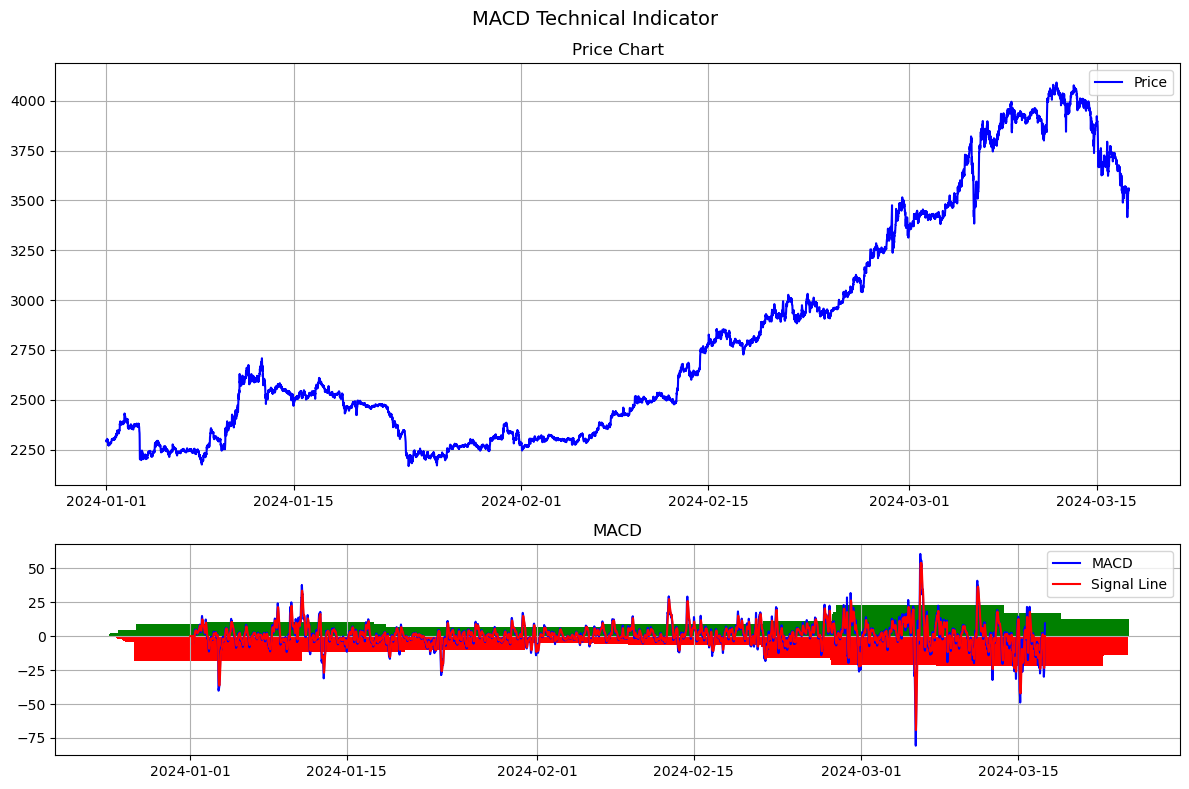

In [41]:
plot_macd(df.index, df.close, macd, macdsignal.fillna(0), macdhist.fillna(0))

In [42]:
df['macd'] = macd

In [43]:
df.macd

timestamp
2024-01-01 00:04:00+00:00   NaN
2024-01-01 00:15:00+00:00   NaN
2024-01-01 00:26:00+00:00   NaN
2024-01-01 00:37:00+00:00   NaN
2024-01-01 00:48:00+00:00   NaN
                             ..
2024-03-17 09:13:00+00:00   NaN
2024-03-17 09:24:00+00:00   NaN
2024-03-17 09:35:00+00:00   NaN
2024-03-17 09:46:00+00:00   NaN
2024-03-17 09:57:00+00:00   NaN
Name: macd, Length: 10000, dtype: float64

<Axes: xlabel='timestamp'>

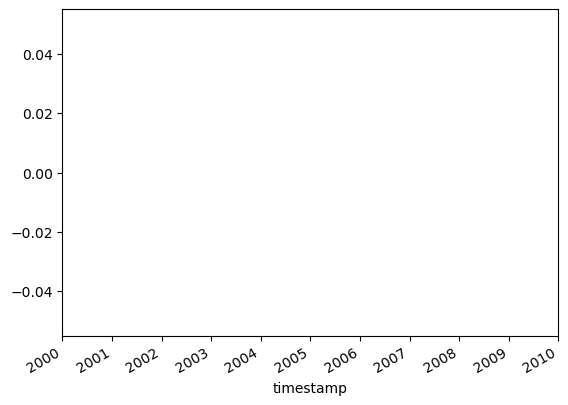

In [44]:
df.macd.plot()

In [45]:
df['macdsignal'] = macdsignal
df['macdhist'] = macdhist



In [46]:
df['bollinger_upper'], df['bollinger_middle'], df['bollinger_lower'] = talib.BBANDS(df.close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)


In [47]:
df['atr'] = talib.ATR(df.high, df.low, df.close, timeperiod=14)

df.atr.describe()


count    9986.000000
mean        9.900662
std         7.870853
min         1.601945
25%         5.314619
50%         7.939466
75%        11.586455
max        99.928248
Name: atr, dtype: float64

<Axes: xlabel='timestamp'>

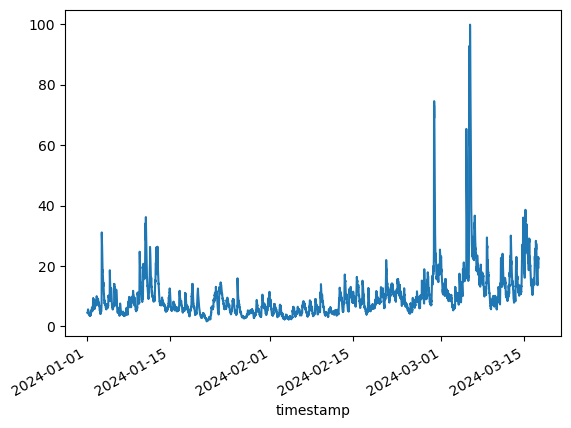

In [48]:
df.atr.plot()

In [49]:
cash = 100000.00
position_value = 0
risk_per_trade = 0.10
num_shares = 0 
df['signal'] = ''
for idx, row in df.iterrows():
    if (row['macdsignal'] > row['macd']) & (row['bollinger_lower'] < row['close']):
        row['signal'] = 'buy_signal'

        row['']

        

In [70]:
from codecs import utf_16_be_decode
from dataclasses import dataclass
from math import e
from typing import List, Dict, Optional
import pandas as pd
import numpy as np
from datetime import datetime

@dataclass
class BacktestResult:
    """Container for backtest results"""
    trades: pd.DataFrame
    metrics: Dict[str, float]
    equity_curve: pd.Series
    positions: pd.Series
    signals: pd.Series

class DataFrameBacktester:
    def __init__(self, config_path: str):
        with open(config_path, 'r') as f:
            self.config = yaml.safe_load(f)
            print(self.config)
        
        # Store configuration
        self.symbol = self.config['symbol']
        self.risk_config = self.config['risk_management']
        
        # Initialize state
        self.position = False
        self.entry_price = 0
        self.position_size = 0

    def _check_entry_conditions(self, row: pd.Series) -> bool:
        """Check if entry conditions are met"""
        conditions = []
        
        # MACD condition
        if 'macd' in row and 'macd_signal' in row:
            macd_cross = (row['macd'] > row['macd_signal']) & (row['macd_prev'] <= row['macd_signal_prev'])
            conditions.append(macd_cross)
        
        # Bollinger condition
        if 'bb_lower' in row:
            price_cross_lower = (row['close'] < row['bb_lower']) & (row['close_prev'] >= row['bb_lower_prev'])
            conditions.append(price_cross_lower)
        
        return all(conditions)

    def _check_exit_conditions(self, row: pd.Series) -> bool:
        """Check if exit conditions are met"""
        conditions = []
        
        # ATR condition
        if 'atr' in row:
            atr_condition = row['atr'] > 25
            conditions.append(atr_condition)
        
        # RSI condition
        if 'rsi' in row and 'rsi_prev' in row:
            rsi_cross = (row['rsi'] > 70) & (row['rsi_prev'] <= 70)
            conditions.append(rsi_cross)
        
        return any(conditions)

    def _calculate_position_size(self, row: pd.Series, account_balance: float) -> float:
        """Calculate position size based on risk management rules"""
        try:
            if self.risk_config['position_sizing_method'] == 'atr_based':
                # Make sure ATR exists and is not NaN
                if 'atr' not in row or pd.isna(row['atr']):
                    print(f"Warning: ATR is missing or NaN. Available columns: {row.index.tolist()}")
                    return 0.0
                
                risk_amount = account_balance * self.risk_config['risk_per_trade']
                stop_distance = float(row['atr']) * self.risk_config['atr_multiplier']
                
                # Avoid division by zero
                if stop_distance <= 0:
                    print(f"Warning: Invalid stop distance: {stop_distance}")
                    return 0.0
                    
                position_size = risk_amount / stop_distance
                max_position_size = self.risk_config['max_position_size']
                
                print(f"""
    Position Size Calculation:
    - Account Balance: {account_balance}
    - Risk Amount: {risk_amount}
    - ATR: {row['atr']}
    - Stop Distance: {stop_distance}
    - Calculated Position Size: {position_size}
    - Max Position Size: {max_position_size}
                """)
                
                return min(position_size, max_position_size)
                
            elif self.risk_config['position_sizing_method'] == 'fixed':
                return self.risk_config['max_position_size']
            
            elif self.risk_config['position_sizing_method'] == 'risk_based':
                risk_amount = account_balance * self.risk_config['risk_per_trade']
                stop_distance = row['close'] * self.risk_config['stop_loss']
                
                if stop_distance <= 0:
                    print(f"Warning: Invalid stop distance: {stop_distance}")
                    return 0.0
                    
                position_size = risk_amount / stop_distance
                return min(position_size, self.risk_config['max_position_size'])
                
        except Exception as e:
            print(f"Error calculating position size: {str(e)}")
            print(f"Row data: {row}")
            return 0.0

    def _calculate_pnl(self, entry_price: float, exit_price: float, position_size: float) -> float:
        """Calculate PnL for a trade with validation"""
        try:
            if any(pd.isna([entry_price, exit_price, position_size])):
                print(f"""
    Invalid PnL calculation values:
    - Entry Price: {entry_price}
    - Exit Price: {exit_price}
    - Position Size: {position_size}
                """)
                return 0.0
                
            pnl = (exit_price - entry_price) * position_size
            return pnl
            
        except Exception as e:
            print(f"Error calculating PnL: {str(e)}")
            return 0.0

    def _check_stop_loss(self, row: pd.Series) -> bool:
        """Check if stop loss is hit"""
        if not self.position:
            return False
        return row['close'] <= self.entry_price * (1 - self.risk_config['stop_loss'])

    def _check_take_profit(self, row: pd.Series) -> bool:
        """Check if take profit is hit"""
        if not self.position:
            return False
        return row['close'] >= self.entry_price * (1 + self.risk_config['take_profit'])

    def backtest(self, df: pd.DataFrame, initial_balance: float = 100000.0) -> BacktestResult:
        """
        Run backtest on DataFrame with pre-calculated indicators
        """
        # Create copies of data for manipulation
        data = df.copy()
        
        # Add previous values for crossover calculations
        for col in ['close', 'macd', 'macd_signal', 'bb_lower', 'rsi']:
            if col in data.columns:
                data[f'{col}_prev'] = data[col].shift(1)
        
        # Initialize results tracking
        trades_list = []
        balance = initial_balance
        # Initialize equity as a numpy array with float dtype
        equity = np.full(len(data), initial_balance, dtype=np.float64)
        positions = pd.Series(0, index=data.index)
        signals = pd.Series(None, index=data.index)
        
        # Run backtest
        for i, (idx, row) in enumerate(data.iterrows()):
            try:
                current_equity = balance
                
                # Check for exits if in position
                if self.position:
                    # Calculate unrealized P&L
                    unrealized_pnl = (row['close'] - self.entry_price) * self.position_size
                    current_equity = balance + unrealized_pnl
                    positions[idx] = self.position_size
                    
                    # Check stop loss
                    if self._check_stop_loss(row):
                        trade_pnl = (row['close'] - self.entry_price) * self.position_size
                        balance += trade_pnl
                        trades_list.append({
                            'entry_time': self.entry_time,
                            'exit_time': idx,
                            'entry_price': self.entry_price,
                            'exit_price': row['close'],
                            'quantity': self.position_size,
                            'pnl': trade_pnl,
                            'exit_type': 'stop_loss'
                        })
                        signals[idx] = 'stop_loss_exit'
                        self.position = False
                        equity[i] = float(balance)
                        continue
                    
                    # Check take profit
                    if self._check_take_profit(row):
                        trade_pnl = (row['close'] - self.entry_price) * self.position_size
                        balance += trade_pnl
                        trades_list.append({
                            'entry_time': self.entry_time,
                            'exit_time': idx,
                            'entry_price': self.entry_price,
                            'exit_price': row['close'],
                            'quantity': self.position_size,
                            'pnl': trade_pnl,
                            'exit_type': 'take_profit'
                        })
                        
                        print(f"\nTrade recorded:")
                        print(f"Entry price: {self.entry_price}")
                        print(f"Exit price: {row['close']}")
                        print(f"Position size: {self.position_size}")
                        print(f"PnL: {trade_pnl}")

                        signals[idx] = 'take_profit_exit'
                        self.position = False
                        equity[i] = float(balance)
                        continue
                    
                    # Check regular exit conditions
                    if self._check_exit_conditions(row):
                        trade_pnl = (row['close'] - self.entry_price) * self.position_size
                        balance += trade_pnl
                        trades_list.append({
                            'entry_time': self.entry_time,
                            'exit_time': idx,
                            'entry_price': self.entry_price,
                            'exit_price': row['close'],
                            'quantity': self.position_size,
                            'pnl': trade_pnl,
                            'exit_type': 'signal'
                        })

                        print(f"\nTrade recorded:")
                        print(f"Entry price: {self.entry_price}")
                        print(f"Exit price: {row['close']}")
                        print(f"Position size: {self.position_size}")
                        print(f"PnL: {trade_pnl}")

                        signals[idx] = 'signal_exit'
                        self.position = False
                        equity[i] = float(balance)
                        continue
                
                # Check entry conditions if not in position
                elif self._check_entry_conditions(row):
                    self.position_size = self._calculate_position_size(row, balance)
                    self.position = True
                    self.entry_price = row['close']
                    self.entry_time = idx
                    positions[idx] = self.position_size
                    signals[idx] = 'entry'
                
                # Update equity for current bar
                equity[i] = float(current_equity)
                
            except Exception as e:
                print(f"Error at index {i}: {str(e)}")
                equity[i] = equity[i-1] if i > 0 else initial_balance
        
        # Create trades DataFrame
        trades_df = pd.DataFrame(trades_list)
        if len(trades_df) > 0:
            trades_df.set_index('entry_time', inplace=True)
        
        # Convert equity array to Series with proper index
        equity_series = pd.Series(equity, index=data.index)
        
        # Calculate metrics
        metrics = self._calculate_metrics(trades_df, equity_series, initial_balance)
        
        return BacktestResult(
            trades=trades_df,
            metrics=metrics,
            equity_curve=equity_series,
            positions=positions,
            signals=signals
        )

    def _calculate_metrics(self, trades: pd.DataFrame, equity: pd.Series, initial_balance: float) -> Dict[str, float]:
        """Calculate backtest performance metrics"""
        if len(trades) == 0:
            return {
                "total_trades": 0,
                "win_rate": 0,
                "profit_factor": 0,
                "total_return": 0,
                "max_drawdown": 0,
                "sharpe_ratio": 0
            }
        
        # Calculate returns and drawdown
        returns = equity.pct_change().dropna()
        drawdown = (equity - equity.cummax()) / equity.cummax()
        
        # Calculate trade metrics
        winning_trades = trades[trades['pnl'] > 0]
        losing_trades = trades[trades['pnl'] <= 0]
        
        metrics = {
            "total_trades": len(trades),
            "winning_trades": len(winning_trades),
            "losing_trades": len(losing_trades),
            "win_rate": len(winning_trades) / len(trades),
            "profit_factor": abs(winning_trades['pnl'].sum() / losing_trades['pnl'].sum()) if len(losing_trades) > 0 else float('inf'),
            "total_return": (equity.iloc[-1] - initial_balance) / initial_balance,
            "max_drawdown": abs(drawdown.min()),
            "sharpe_ratio": np.sqrt(252) * returns.mean() / returns.std() if len(returns) > 0 else 0
        }
        
        return metrics

In [77]:
strat_file

WindowsPath('config/trading_system.yaml')

In [71]:


# Initialize and run backtest
backtester = DataFrameBacktester(strat_file)
# Run backtest
results = backtester.backtest(df, initial_balance=100000)

# Print results
print("\nBacktest Metrics:")
for metric, value in results.metrics.items():
    if isinstance(value, float):
        print(f"{metric}: {value:.2%}" if "rate" in metric or "return" in metric else f"{metric}: {value:.2f}")
    else:
        print(f"{metric}: {value}")

# Look at trades
print("\nTrades:")
print(results.trades)

# Create analysis DataFrame
analysis_df = df.copy()
analysis_df['Position'] = results.positions
analysis_df['Signal'] = results.signals
analysis_df['Equity'] = results.equity_curve

print("\nStrategy Analysis:")
print(analysis_df.tail())

{'symbol': 'ETHUSD', 'timeframe': '1h', 'mode': 'backtest', 'risk_management': {'position_sizing_method': 'atr_based', 'risk_per_trade': 0.02, 'max_position_size': 1.0, 'stop_loss': 0.02, 'take_profit': 0.04, 'max_drawdown': 0.15, 'atr_multiplier': 2.0}, 'entry_conditions': [{'indicator': 'MACD', 'params': {'fast_period': 12, 'slow_period': 26, 'signal_period': 9}, 'comparison': 'crosses_above', 'threshold': 0}, {'indicator': 'Bollinger', 'params': {'window': 20, 'std_dev': 2}, 'comparison': 'crosses_below', 'threshold': 'lower'}], 'exit_conditions': [{'indicator': 'ATR', 'params': {'window': 14}, 'comparison': 'above', 'threshold': 15}, {'indicator': 'RSI', 'params': {'window': 14}, 'comparison': 'crosses_above', 'threshold': 70}]}

Trade recorded:
Entry price: 2296.0055
Exit price: 2389.235
Position size: 0.0
PnL: 0.0

    Position Size Calculation:
    - Account Balance: 100000.0
    - Risk Amount: 2000.0
    - ATR: 9.077215836849746
    - Stop Distance: 18.15443167369949
    - Calc

C:\Users\fwmac\AppData\Local\Temp\ipykernel_26456\1041782854.py:254: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'entry' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  signals[idx] = 'entry'



    Position Size Calculation:
    - Account Balance: 99964.22512282849
    - Risk Amount: 1999.2845024565697
    - ATR: 6.608734351995105
    - Stop Distance: 13.21746870399021
    - Calculated Position Size: 151.26077066882007
    - Max Position Size: 1.0
                

    Position Size Calculation:
    - Account Balance: 99912.71012282849
    - Risk Amount: 1998.2542024565698
    - ATR: 8.77855014426182
    - Stop Distance: 17.55710028852364
    - Calculated Position Size: 113.81459179581877
    - Max Position Size: 1.0
                

    Position Size Calculation:
    - Account Balance: 99862.90212282848
    - Risk Amount: 1997.2580424565697
    - ATR: 13.060216310048732
    - Stop Distance: 26.120432620097464
    - Calculated Position Size: 76.46343655578846
    - Max Position Size: 1.0
                

    Position Size Calculation:
    - Account Balance: 99816.21862282848
    - Risk Amount: 1996.3243724565698
    - ATR: 9.660188529217796
    - Stop Distance: 19.32037705

In [76]:
results.metrics

{'total_trades': 237,
 'winning_trades': 127,
 'losing_trades': 110,
 'win_rate': 0.5358649789029536,
 'profit_factor': np.float64(1.1880986427415097),
 'total_return': np.float64(0.008209832308699407),
 'max_drawdown': 0.009097007621848095,
 'sharpe_ratio': np.float64(0.16933536419849715)}

In [78]:
100000 * 0.008209832308699407

820.9832308699407

In [51]:
for col in ['close', 'macd', 'macdsignal', 'bollinger_lower', 'rsi']:
            if col in df.columns:
                df[f'{col}_prev'] = df[col].shift(1)

indexing = 0

for idx, row in df.iterrows():
    if (row['macd'] > row['macdsignal']) & (row['macd_prev'] <= row['macdsignal_prev']):
        indexing += 1
        print("signal buy!", indexing, idx, row['close'], row['close_prev'])


In [52]:
for idx, row in df.iterrows():
    bollinger_indx = 0
    if (row['close'] < row['bollinger_lower']) & (row['bollinger_lower'] >= row['bollinger_lower_prev']):
        
        print("signal buy!", bollinger_indx, idx, row['close'], row['close_prev'])


signal buy! 0 2024-01-06 22:20:00+00:00 2238.1035 2242.3425
signal buy! 0 2024-01-10 12:30:00+00:00 2376.4775 2380.79
signal buy! 0 2024-01-15 14:03:00+00:00 2529.4885 2536.5513737765
signal buy! 0 2024-01-26 19:22:00+00:00 2257.715 2261.07
signal buy! 0 2024-01-29 12:38:00+00:00 2257.19 2262.3
signal buy! 0 2024-02-03 18:35:00+00:00 2296.996 2301.78
signal buy! 0 2024-02-10 17:03:00+00:00 2487.858 2491.85
signal buy! 0 2024-02-17 05:15:00+00:00 2786.328 2788.85
signal buy! 0 2024-02-29 09:18:00+00:00 3452.791 3467.0705
signal buy! 0 2024-03-08 05:02:00+00:00 3894.988 3903.713
signal buy! 0 2024-03-09 09:27:00+00:00 3926.0825 3938.637
